# Data Science Portfolio (Part 1)



In [ ]:
import numpy as np
import string
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.feature_selection import VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.regression.linear_model as sm
from sklearn.linear_model import LassoCV
# the code block below is directly downloading data into your drive folder. Please just run it and do not comment out.
from urllib import request
module_url = [f"https://drive.google.com/uc?export=view&id=1NJN0VmS4lWfrGQ86-glTXU_WQeFX0xHJ",
              f"https://drive.google.com/uc?export=view&id=1DGhCMqrxRy_oRZDR7cy2OFDqjI_OHydR"]
name = ['STAT.csv', 'nba.csv']
for i in range(len(name)):
    with request.urlopen(module_url[i]) as f, open(name[i],'w') as outf:
        a = f.read()
        outf.write(a.decode('ISO-8859-1'))

# 1.Pandas & Visualisation

Create a function `sport_viz(df, *args)` that is able to create three differenty types of plots, i.e. **bar plot** via `pandas`, **boxplot** via `seaborn` and **radar chart** via `plotly`.

As of the first input argument `df`, the function get a sport statistics data set named `STAT.csv` which is downloaded into your drive folder.

The second argument `args` is a `tuple` consisting of:
 - `sel` --> (`type str`) variable to select the type of the plot.
    - `sel == 'bar'` should create a bar plot via `pandas` plotting functions. This will always create a groupby outcome by `col` with `.nlargest` function for the corresponding columns of `stats`.
    - `sel == 'box'` should create a boxplot via `seaborn` plotting functions. No grouping needed for this plot but you should color boxes depending on `col` variable.
    - `sel == 'radar'` should create a radar chart by using `ploty.express.line_polar` function. Grouping might be required here and lines should be filled.
 - 'col' --> (`type str`) selection of the target column(s) to be investigated. This can take values from the columns: `'Player', 'Nation', 'Pos', 'Squad'` and `'Comp'`.
 - `stats` --> (`type list` of `str`)a list of column names to be plotted. This can take any number of column names but not the ones specified in `col`.
 - `f` --> (`type str`) an aggregation function needed to perform grouping operations via `pandas`.
 - `addi` --> (`type dict`) a dictionary storing additional parameters required to use in plotting operations. `addi` has a default defition of:

 ```python
 addi = {'n': 2, 'figsize':[4,4], 'colormap': 'Blues', 'notch': True, 'spe_rows': []}
 ```
   - `'n'` is used with `.nlargest()` function of pandas.
   - `'figsize'` is used to set figure sizes
   - `'colormap'` defines the requested color map for the figure
   - `'notch'` is reqired for `boxplot` type
   - `'spe_rows'` is used when some specific rows are required to be plotted, e.g. it would be `['Mohamed Salah', 'Erling Haaland']` as we want to only plot values for these two players.



In [ ]:
def sport_viz(df, *args):
    """
    Visualize sports data using different plot types.

    Args:
        df (DataFrame): The DataFrame containing sports data.
        *args: Variable number of positional arguments.
            sel (str): Type of plot to create ('bar', 'box', 'radar').
            col (str): Column name from DataFrame to plot.
            stats (list): List of column names from DataFrame to use as statistics.
            f (str): Aggregation function to apply to statistics (e.g., 'mean', 'sum').
            addi (dict): Additional options for plotting (optional).
                n (int): Number of top values to display (default is 2).
                figsize (list): Size of the figure (default is [4, 4]).
                colormap (str): Colormap for bar plot (default is 'Blues').
                notch (bool): Whether to draw notches around the median in boxplot (default is True).
                spe_rows (list): List of specific rows to include (default is []).
    """
    sel, col, stats, f, addi = args

    # Default values for addi dictionary
    default_addi = {'n': 2, 'figsize':[4,4], 'colormap': 'Blues', 'notch': True, 'spe_rows': []}

    # Update addi with default values if not provided
    addi = {**default_addi, **addi}

    # Apply operations based on sel argument
    if sel == 'bar':
        # Filter DataFrame based on specific rows if provided
        if addi['spe_rows']:
            df = df[df[col].isin(addi['spe_rows'])]

        # Group by specified column and calculate aggregation
        grouped_df = df.groupby(col)[stats].agg(f).nlargest(10,stats[0])

        # Create bar plot
        ax = grouped_df.plot(kind='bar', figsize=addi['figsize'], colormap=addi['colormap'])
        ax.set_ylabel("Values for each statistics")
        ax.set_title("Bar Plot")
        ax.tick_params(axis='x', rotation=45)
    elif sel == 'box':
        # Filter DataFrame based on specific rows if provided
        if addi['spe_rows']:
            df = df[df[col].isin(addi['spe_rows'])]

        # Create box plot using seaborn
        plt.figure(figsize=addi['figsize'])
        sns.boxplot(x=col, y=stats[0], data=df, palette='viridis', notch=addi['notch'])
        plt.ylabel("Values")
        plt.title("Box Plot")
        plt.show()
    elif sel == 'radar':
        # Filter DataFrame based on specific rows if provided
        if addi['spe_rows']:
            df = df[df[col].isin(addi['spe_rows'])]

        # If col is provided, group DataFrame and calculate mean
        if col:
            grouped_df = df.groupby(col)[stats].mean().reset_index()
        else:
            grouped_df = df[stats]

        # Melt DataFrame for radar plot
        grouped_df = pd.melt(grouped_df, id_vars=[col],var_name='category', value_name='value',value_vars=stats)

        # Create radar plot using plotly
        fig = px.line_polar(grouped_df, r='value', theta='category', color=col,line_close=True, line_shape='linear')
        fig.update_traces(fill='toself')
        fig.show()


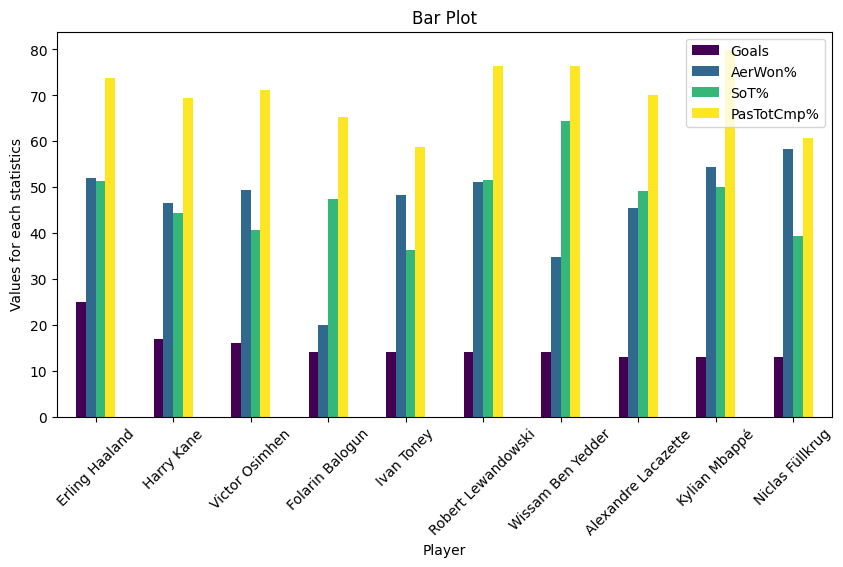

In [ ]:
df = pd.read_csv('STAT.csv')
col = 'Player'
stats = ['Goals', 'AerWon%', 'SoT%', 'PasTotCmp%']
f = 'sum'
additional = {'n':10, 'figsize':[10,5], 'colormap':'viridis', 'notch':True, 'spe_cols': []}
fig1 = sport_viz(df, 'bar', col, stats, f, additional)

# 2 Web Scraping

Create a function `grammy_scraper(url, start, end, PerfQuery)` that takes a wikipedia page URL (`url`) as input and performs web scraping. The page stores information about The Grammy Award for Best Rock Song category winners and nominees between 1992 and 2023.

Your task is to use `BeautifulSoup` module to scrape the corresponding page, finding the target table, extracting information from HMTL syntax between dates of `start` and `end` and to create a data frame in the end.

The function `grammy_scraper(url, start, end, PerfQuery)` will then perform a pandas query for a fiven `'Performer'` of `PerfQuery` finding number of times nominated and won the award.


In [ ]:

def grammy_scraper(url, start, end, PerfQuery):
    """
    Scrape Grammy Awards data from a Wikipedia page.

    Args:
        url (str): The URL of the Wikipedia page to scrape.
        start (int): The starting year of the Grammy Awards to consider.
        end (int): The ending year of the Grammy Awards to consider.
        PerfQuery (str): The performer to search for in the Grammy data.

    Returns:
        DataFrame: A DataFrame containing the scraped data.

    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the target table with class "wikitable"
    table = soup.find('table', class_='wikitable')

    # Initialize an empty DataFrame to store the scraped data
    dataframe = pd.DataFrame()

    # Initialize a list to store winners' names
    winner = []

    # Iterate through each row of the table
    for row in table.find_all('tr')[1:]:
        # Extract the columns from the row
        performer = []
        work = []
        columns = row.find_all('td')
        year = row.find_all('th')[0].text.strip()

        # Check if the year is within the specified range
        if int(year) >= start and int(year) <= end:
            winner.append(columns[2].text.strip())
            performer.append(columns[2].text.strip())
            work.append(columns[1].text.strip())

            # Extract performer and work from each nomination
            for y in columns[3].find_all('li'):
                a = re.search(r'"([^"]+)"', y.text.strip()).group(1)
                work.append(a)
                b = re.search(r'\(([^)]+)\)',y.text.strip()).group(1)
                performer.append(b)

            # Create a DataFrame for the current row
            df = pd.DataFrame()
            df['Year'] = year
            df['Performer'] = performer
            df['Work'] = work
            df['Year'] = year
            df['Winner'] = (df['Performer'] == df['Performer'].iloc[0])  # Check if the performer is the winner

            # Concatenate the current DataFrame with the main DataFrame
            dataframe = pd.concat([dataframe, df], ignore_index=True)

    # Count how many times the performer was nominated and won
    won_times = sum(item.count(PerfQuery) for item in winner)
    nominated_times = dataframe['Performer'].value_counts().get(PerfQuery,0)

    # Print summary information
    print(f"Between years {start} and {end}, {PerfQuery} has been nominated for the Grammy Awards {nominated_times} times. Among those nominations, {PerfQuery} won the award {won_times} times.")

    # Display the first few rows of the DataFrame
    print(dataframe.head())

    return dataframe


In [ ]:
start = 2001
end = 2012
PerfQuery = 'U2'
url = 'https://en.wikipedia.org/wiki/Grammy_Award_for_Best_Rock_Song'
df = grammy_scraper(url, start, end, PerfQuery)


Between years 2001 and 2012, U2 has been nominated for the Grammy Awards 5 times. Among those nominations, U2 won the award 2 times.
   Year              Performer                   Work  Winner
0  2001                  Creed  "With Arms Wide Open"    True
1  2001           3 Doors Down             Kryptonite   False
2  2001          Lenny Kravitz                  Again   False
3  2001        Matchbox Twenty                   Bent   False
4  2001  Red Hot Chili Peppers        Californication   False


# 3 Statistics

 Given a data set (`nba.csv`) which is a record of statistics of several rookie NBA players throughout their first season. Given these sets of features, the task is to (1) select significant features via four different approaches, and (2) perform a prediction comparison of feature selection techniques using Logistic regression. The prediction task will be to check whether the player would still be playing in the NBA 5 years later (column `'5yrs'`) (1 -indicating he will play or 0- indicating he won’t play).
```python
|    | name            |   games_played |   minutes_played |   points_scored |   goals_scored |   goals_attempted |   3_point_scored |   3_point_attempted |   free_throws_scored |   free_throws_attempted |   offensive_rebounds |   defensive_rebounds |   assists |   steals |   blocks |   turnover |   5yrs |
|---:|:----------------|---------------:|-----------------:|----------------:|---------------:|------------------:|-----------------:|--------------------:|---------------------:|------------------------:|---------------------:|---------------------:|----------:|---------:|---------:|-----------:|-------:|
|  0 | Brandon Ingram  |             36 |             27.4 |             7.4 |            2.6 |               7.6 |              0.5 |                 2.1 |                  1.6 |                     2.3 |                  0.7 |                  3.4 |       1.9 |      0.4 |      0.4 |        1.3 |      0 |
|  1 | Andrew Harrison |             35 |             26.9 |             7.2 |            2   |               6.7 |              0.7 |                 2.8 |                  2.6 |                     3.4 |                  0.5 |                  2   |       3.7 |      1.1 |      0.5 |        1.6 |      0 |
|  2 | JaKarr Sampson  |             74 |             15.3 |             5.2 |            2   |               4.7 |              0.4 |                 1.7 |                  0.9 |                     1.3 |                  0.5 |                  1.7 |       1   |      0.5 |      0.3 |        1   |      0 |
|  3 | Malik Sealy     |             58 |             11.6 |             5.7 |            2.3 |               5.5 |              0.1 |                 0.5 |                  0.9 |                     1.3 |                  1   |                  0.9 |       0.8 |      0.6 |      0.1 |        1   |      1 |
|  4 | Matt Geiger     |             48 |             11.5 |             4.5 |            1.6 |               3   |              0   |                 0.1 |                  1.3 |                     1.9 |                  1   |                  1.5 |       0.3 |      0.3 |      0.4 |        0.8 |      1 |
```


##3.1 Feature Extraction/Selection
Create a function `Fextractor(*args)` that performs feature selection operations for the given data set using (1) variance thresholding, (2) importance, (3) Pearson-correlation and (4) LASSO regularisation techniues.

Function input `args` is a tuple and consisting of:
 - `df` --> data set.
 - `target` --> a `str` variable of target column to be predicted in `df` (`'5yrs'`).
 - `sel` --> a `str` variable refers to the selection of feature selection technique. Takes a value from `['var', 'imp', 'cor', 'lasso']`.
 - `addi` --> a `dict` variable storing technique specific additional variables.

Function *returns* the selected features in a `list` format.




In [ ]:
def Fextractor(df, target, sel, addi={}):
    """
    Extract features from a DataFrame based on specified selection method.

    Args:
        df (DataFrame): The DataFrame containing the dataset.
        target (str): The target variable to predict.
        sel (str): The feature selection method ('var', 'imp', 'cor', 'lasso').
        addi (dict, optional): Additional parameters for feature selection (default is {}).

    Returns:
        list: A list of selected features.

    Raises:
        ValueError: If sel is not one of ['var', 'imp', 'cor', 'lasso'].
    """
    # Drop rows with missing values
    df.dropna(inplace=True)

    # Separate features and target variable
    X_cor = df.drop(columns=['name'])
    X = df.drop(columns=[target, 'name'])
    y = df[target]

    # Get threshold value from addi dictionary
    threshold = addi.get('threshold', 0.0)

    if sel == 'var':
        # Variance threshold feature selection
        selector = addi.get('var_func', VarianceThreshold)(threshold=threshold[0])
        selector.fit(X)
        selected_features = list(X.columns[selector.get_support()])

    elif sel == 'imp':
        # Permutation importance feature selection
        model = addi.get('imp_func', LinearRegression)()
        model.fit(X, y)
        result = permutation_importance(model, X, y, n_repeats=100, random_state=0)
        feature_importances = pd.Series(result.importances_mean, index=X.columns)
        selected_features = feature_importances[feature_importances > threshold[1]].index.tolist()

    elif sel == 'cor':
        # Correlation-based feature selection
        corr_threshold = addi.get('threshold', 0.5)
        corr_matrix = X_cor.corr()
        selected_features = [col for col in corr_matrix.columns if abs(corr_matrix[col][target]) >= corr_threshold[2]]
        selected_features.remove(target)

    elif sel == 'lasso':
        # Lasso regression feature selection
        lasso_model = addi.get('lasso_func', LassoCV)()
        lasso_model.fit(X, y)
        selected_features = list(X.columns[lasso_model.coef_ != 0])

    else:
        raise ValueError("Invalid value for sel. Please choose from ['var', 'imp', 'cor', 'lasso'].")

    return selected_features


In [ ]:
df = pd.read_csv('nba.csv')
target = '5yrs'
sel = 'imp'
addi = {'threshold':[0.5, 0.01, 0.15, 0], 'imp_func':LinearRegression}
Fextractor(df, target, sel, addi)

['games_played',
 '3_point_scored',
 '3_point_attempted',
 'free_throws_scored',
 'free_throws_attempted',
 'offensive_rebounds']

## 3.2 Prediction and Performance Analysis

 Perform Logistic regression perdictions for target variable `'5yrs'` by using each of the four feature. Then, visualise the prediction performance, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics.

For this purpose,
 - create a function `prediction_perf(*args)` which evaluates the prediction performance of the Logistic regression model with different features.
 - Function input `args` is a tuple and consisting of:
 - `df` --> data set.
 - `target` --> a `str` variable of target column to be predicted in `df`.
 - `addi` --> a `dict` variable storing technique specific additional variables.
 ```python
 addi = {'threshold':[0, 0, 0, 0], 'imp_func':LinearRegression}
 ```
 - Up to this point, you should have obtained the selected features from (1) variance thresholding, (2) importance, (3) Pearson-correlation and (4) LASSO regularisation techniues.
 - Also, in `prediction_perf(*args)`, you should also prepare the data for training and testing (E.g. use `sklearn` library's `train_test_split` function!)
 - Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated from the expression below (Do not use `sklearn` function for MSE!):

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

 - In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model.

 - You then need to create a `pandas` dataframe `df_results` and the `prediction_perf()` function should `print` and `return` this.

 - Consequently, by using `matplotlib` library, plot ROC curve for all four prediction results.



In [ ]:
def prediction_perf(df, target, *args):
    """
    Evaluate prediction performance using different feature selection methods.

    Args:
        df (DataFrame): The DataFrame containing the dataset.
        target (str): The target variable to predict.
        *args: Additional arguments (not used).

    Returns:
        DataFrame: A DataFrame containing the evaluation results.

    """
    # Drop rows with missing values
    df.dropna(inplace=True)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target,'name']), df[target], test_size=0.2, random_state=42)

    # Initialize an empty DataFrame to store the results
    df_results = pd.DataFrame(columns=['Model', 'Acc%', 'MSE', 'AUC'])
    sel = {'var':'Variance Thresholding','imp':'Importance','cor':'Correlation','lasso':'LASSO Reg'}

    # Iterate over each feature selection method
    for sel, method in sel.items():
        # Extract features using the specified feature selection method
        features = Fextractor(df, target, sel, addi)

        # Create a logistic regression model
        model = LogisticRegression()

        # Fit the model using the selected features
        model.fit(X_train[features], y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test[features])

        # Calculate MSE manually
        mse = sum((true - pred) ** 2 for true, pred in zip(y_test, y_pred)) / len(y_test)

        # Calculate prediction accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Calculate ROC curve parameters and AUC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)

        # Append results to the DataFrame
        df_results = pd.concat([df_results, pd.DataFrame({'Model': [method],'Acc%': [accuracy], 'MSE': [mse],'AUC': [auc_score]})], ignore_index=True)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{method} (AUC = {auc_score:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Display the evaluation results
    print(df_results)
    return df_results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

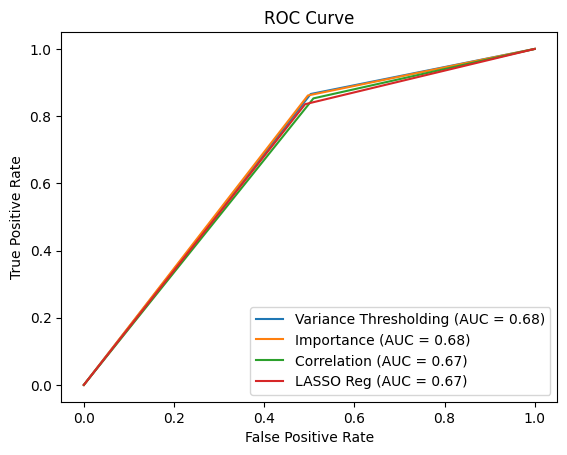

                   Model      Acc%       MSE       AUC
0  Variance Thresholding  0.713198  0.286802  0.681367
1             Importance  0.713198  0.286802  0.682270
2            Correlation  0.703046  0.296954  0.671806
3              LASSO Reg  0.700508  0.299492  0.672350


In [ ]:
target = '5yrs'
addi = {'threshold':[0.5, 0.01, 0.15, 0], 'imp_func':LinearRegression}
df_results = prediction_perf(df, target, addi)